In [3]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Genetic Algorithm

## Cellular Automata Implementation

In [4]:
def get_cell_neighborhood(cellular_automata_state, cell_position, r):
    right = [cellular_automata_state[(cell + 1) % len(cellular_automata_state)] for cell in range(cell_position, cell_position + r)]
    left = [cellular_automata_state[(cell + 1) % len(cellular_automata_state)] for cell in range(cell_position - r - 1, cell_position - 1)]
    return left + [cellular_automata_state[cell_position]] + right

In [5]:
def get_next_state(rule, neighborhood_state):
    position = int("".join(str(x) for x in neighborhood_state), 2)
    return rule[position]

In [6]:
def compute_celullar_automata(cellular_automata_state, rule, r):
    new_cellular_automata_state = []
    for cell_position in range(0, len(cellular_automata_state)):
        neighborhood_state = get_cell_neighborhood(cellular_automata_state, cell_position, r)
        next_state = get_next_state(rule, neighborhood_state)
        new_cellular_automata_state.append(next_state)
    return new_cellular_automata_state

In [7]:
def run_cellular_automate(initial_state, rule, r, ca_steps):
    cellular_automate = []
    for i in range(0, ca_steps):
        initial_state = compute_celullar_automata(initial_state, rule, r)
        cellular_automate.append(initial_state)
    return cellular_automate

In [8]:
def get_random_rule(s, n):
    rule_size = s ** n
    rule_space = s ** rule_size
    random_rule = random.getrandbits(rule_size)
    rule_list =  list(map(int, list(np.binary_repr(random_rule,rule_size))))
    return rule_list

## Genetic algorithm implementation

In [9]:
def create_training_set(size, s, network_size):
    return [list(np.random.randint(0, s, network_size)) for i in range(size)]

In [10]:
def create_population(size, s, n):
    return [[get_random_rule(s, n), 0] for i in range(population_size)]

In [19]:
def compute_fitness(individual, training_set, r, steps):
    performance_list = []
    for example in training_set:
        count_ones = np.count_nonzero(example)
        count_zeroes = len(example) - count_ones
        if count_zeroes > count_ones:
            majority = 0
        else:
            majority = 1
            ca_dynamics = run_cellular_automate(example, individual, r, len(training_set))
            performance = (len(ca_dynamics[len(ca_dynamics) - 1]) - np.count_nonzero(ca_dynamics[len(ca_dynamics) - 1])) / len(training_set)# T4. extract last network configuration (last time step), count how many cells are in majority state and divide by network size
            performance_list.append(performance)
    return sum(performance_list) / len(performance_list)

In [20]:
def cross_over(parent_1, parent_2, points):
    for i in range(points, len(parent_1)):
        parent_1[i], parent_2[i] = parent_2[i], parent_1[i]
    return parent_1, parent_2

In [21]:
def mutation(child, mutation_rate):
    result = []    
    for s in child:
        if random.random() < mutation_rate:
            s = random.randint(0, 1)
        result.append(s)
    return result

In [22]:
def do_generation(population, training_set, r, ca_steps):
    for individual in population:
        individual[1] = compute_fitness(individual[0], training_set, r, ca_steps)
    population = sorted(population, key=lambda x: x[1], reverse=True)
    return population

In [23]:
def next_generation(population, training_set, r, ca_steps, cross_over_points, mutation_rate, elite_size):
    elite = population[:elite_size]
    if (len(population) > elite_size):
        parents = list(itertools.combinations(elite, 2))
        while len(elite) < len(population):
            parent_1, parent_2 = parents.pop(random.randint(0,len(parents)-1))
            child_1, child_2 = cross_over(parent_1[0], parent_2[0], cross_over_points)
            elite.append([mutation(child_1, mutation_rate), 0])
            elite.append([mutation(child_2, mutation_rate), 0])
        while len(elite) != len(population):
            elite.pop(random.randint(0,len(elite)-1))
    return elite

In [24]:
def run_genetic_algorithm(population, training_set, r, ca_steps, cross_over_points, mutation_rate, elite_size, num_gens):
    result = []
    gen = do_generation(population, training_set, r, ca_steps)
    result.append(gen)
    for i in range(num_gens):
        gen = next_generation(gen, training_set, r, ca_steps, cross_over_points, mutation_rate, elite_size)
        gen = do_generation(gen, training_set, r, ca_steps)
        result.append(gen)
    return result

In [25]:
rule = 110
r = 3
n = (2 * r) + 1
s = 2

network_size = 151

ca_steps = 10

my_rule = get_random_rule(s, n)

training_set_size = 10
training_set = create_training_set(training_set_size, s, network_size)

population_size = 20
population = create_population(population_size, s, n)

elite_size = 5
mutation_rate = 0.02
cross_over_points = 1

num_gens = 20
generations = run_genetic_algorithm(population, training_set, r, ca_steps, cross_over_points, mutation_rate, elite_size, num_gens)

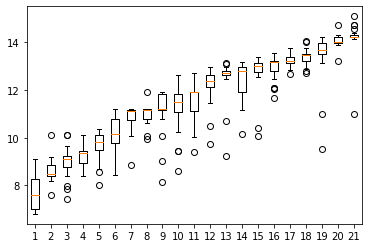

In [26]:
data = []
i = 1
for gen in generations:
    fitnesses = [element[1] for element in gen]
    data.append(fitnesses)
    i += 1
fig = plt.boxplot(data)